<a href="https://colab.research.google.com/github/santoreb/Image_Segmentation_Otsus_Method/blob/main/Otsus_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
# test_data = datasets.MNIST(root = 'data', train = False, transform = ToTensor(), download = True)

newsegmented_data = []

print(train_data)
print(train_data.data.size())
print(train_data.targets.size())

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])
torch.Size([60000])


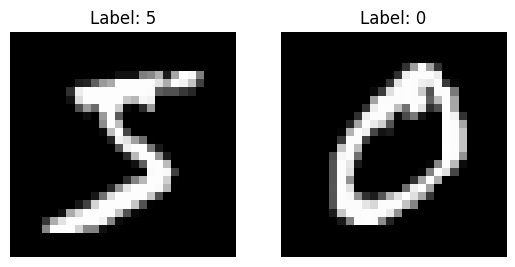

In [27]:
fig, axs = plt.subplots(1, 2)
for i in range(2):
    axs[i].imshow(train_data.data[i],cmap='gray')
    axs[i].set_title(f"Label: {train_data.targets[i]}")
    axs[i].axis('off')

plt.show()

In [ ]:
for image in train_data.data:
  size = image.size()[0]*image.size()[0]
  unique, count = image.unique(return_counts=True)
  unique = unique[:-1]
  count = count[:-1]
  w = count/size
  wk = torch.cumsum(w,axis=0)
  mu = unique*w
  mut = mu.sum()
  muk = torch.cumsum(mu,axis=0)
  sigmak = (mut*wk - muk)**2/(wk*(1-wk))
  newimage = image.clone()
  newimage[newimage>=unique[sigmak.argmax()]] = 1
  newimage[newimage!=1] = 0
  newsegmented_data.append(newimage)

0
1


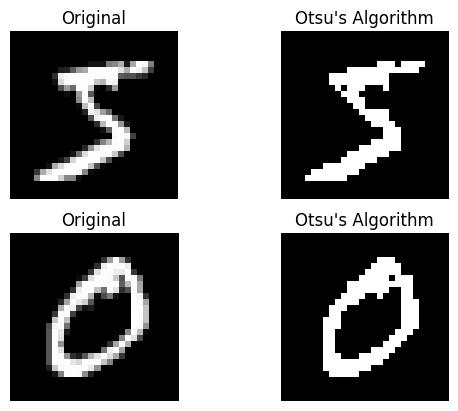

In [ ]:
fig, axs = plt.subplots(2, 2)
for row, original, segmented in zip(range(2), train_data.data[:2], newsegmented_data[:2]):
  print(row)
  axs[row,0].imshow(original,cmap = 'gray')
  axs[row,0].set_title('Original')
  axs[row,0].axis('off')
  axs[row,1].imshow(segmented,cmap = 'gray')
  axs[row,1].set_title('Otsu\'s Algorithm')
  axs[row,1].axis('off')
plt.show()